In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#load data
df = pd.read_csv("/content/drive/MyDrive/MATH 2327/NYC_Taxi_Rides_w_Boroughts.csv")



<ipython-input-5-5b134feacb9d>:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/MATH 2327/NYC_Taxi_Rides_w_Boroughts.csv")


In [66]:
plt.rcParams["axes.grid"] = False

df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_pickup_day,tpep_pickup_time,tpep_dropoff_datetime,tpep_dropoff_day,tpep_dropoff_time,passenger_count,trip_distance,...,congestion_surcharge,airport_fee,total_amount,trip_length_minutes,pickup_hour,pickup_day,Hour,Day,hour,day_of_week
0,0,1,2022-01-01 00:35:40,Saturday,12:35 AM,2022-01-01 00:53:29,Saturday,12:53 AM,2,3.80,...,2.50,0.00,21.95,17.82,0,Saturday,0,Saturday,0,Saturday
1,1,1,2022-01-01 00:33:43,Saturday,12:33 AM,2022-01-01 00:42:07,Saturday,12:42 AM,1,2.10,...,0.00,0.00,13.30,8.40,0,Saturday,0,Saturday,0,Saturday
2,2,2,2022-01-01 00:53:21,Saturday,12:53 AM,2022-01-01 01:02:19,Saturday,01:02 AM,1,0.97,...,0.00,0.00,10.56,8.97,0,Saturday,0,Saturday,0,Saturday
3,3,2,2022-01-01 00:25:21,Saturday,12:25 AM,2022-01-01 00:35:23,Saturday,12:35 AM,1,1.09,...,2.50,0.00,11.80,10.03,0,Saturday,0,Saturday,0,Saturday
4,4,2,2022-01-01 00:36:48,Saturday,12:36 AM,2022-01-01 01:14:20,Saturday,01:14 AM,1,4.30,...,2.50,0.00,30.30,37.53,0,Saturday,0,Saturday,0,Saturday


In [6]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

df['trip_length_minutes'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

df = df[df['trip_length_minutes'] >= 0]


df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_pickup_day,tpep_pickup_time,tpep_dropoff_datetime,tpep_dropoff_day,tpep_dropoff_time,passenger_count,trip_distance,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,airport_fee,total_amount,trip_length_minutes
0,0,1,2022-01-01 00:35:40,Saturday,12:35 AM,2022-01-01 00:53:29,Saturday,12:53 AM,2,3.80,...,14.50,3.00,0.50,3.65,0.00,0.30,2.50,0.00,21.95,17.82
1,1,1,2022-01-01 00:33:43,Saturday,12:33 AM,2022-01-01 00:42:07,Saturday,12:42 AM,1,2.10,...,8.00,0.50,0.50,4.00,0.00,0.30,0.00,0.00,13.30,8.40
2,2,2,2022-01-01 00:53:21,Saturday,12:53 AM,2022-01-01 01:02:19,Saturday,01:02 AM,1,0.97,...,7.50,0.50,0.50,1.76,0.00,0.30,0.00,0.00,10.56,8.97
3,3,2,2022-01-01 00:25:21,Saturday,12:25 AM,2022-01-01 00:35:23,Saturday,12:35 AM,1,1.09,...,8.00,0.50,0.50,0.00,0.00,0.30,2.50,0.00,11.80,10.03
4,4,2,2022-01-01 00:36:48,Saturday,12:36 AM,2022-01-01 01:14:20,Saturday,01:14 AM,1,4.30,...,23.50,0.50,0.50,3.00,0.00,0.30,2.50,0.00,30.30,37.53


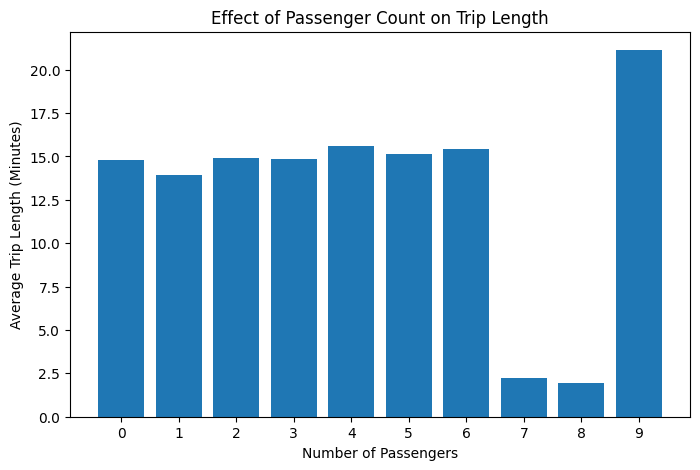

In [9]:
avg_trip_length = df.groupby("passenger_count")["trip_length_minutes"].mean()

plt.figure(figsize=(8, 5))
plt.bar(avg_trip_length.index, avg_trip_length.values)
plt.xlabel("Number of Passengers")
plt.ylabel("Average Trip Length (Minutes)")
plt.title("Effect of Passenger Count on Trip Length")
plt.xticks(avg_trip_length.index)

# Show the plot
plt.show()

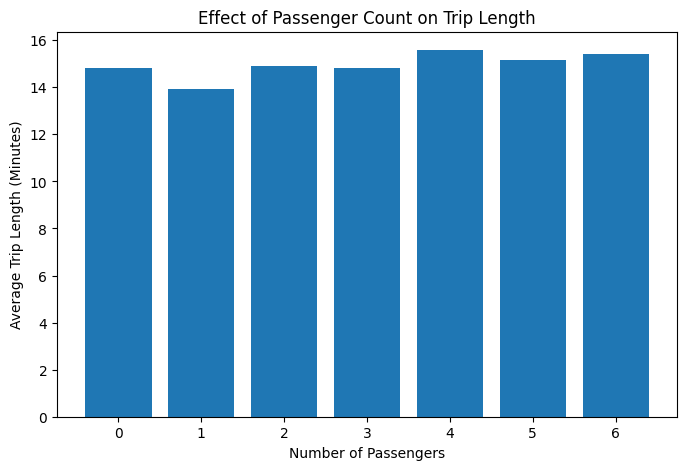

In [10]:
# Filter out passenger counts of 7, 8, and 9
filtered_df = df[~df["passenger_count"].isin([7, 8, 9])]

# Group by passenger count and calculate the average trip length
avg_trip_length = filtered_df.groupby("passenger_count")["trip_length_minutes"].mean()

# Plot the filtered data
plt.figure(figsize=(8, 5))
plt.bar(avg_trip_length.index, avg_trip_length.values)
plt.xlabel("Number of Passengers")
plt.ylabel("Average Trip Length (Minutes)")
plt.title("Effect of Passenger Count on Trip Length")
plt.xticks(avg_trip_length.index)

# Show the plot
plt.show()

In [69]:
df_weird_no_of_passengers = df[df['passenger_count'].isin([0, 7, 8, 9])]

summary_stats_weird_no_of_passengers = df_weird_no_of_passengers.groupby('passenger_count')['trip_length_minutes'].describe()

summary_stats_no_of_passengers = df.groupby('passenger_count')['trip_length_minutes'].describe()

summary_stats_no_of_passengers


,count,mean,std,min,25%,50%,75%,max
passenger_count,,,,,,,,
0,122258.00,14.82,26.28,0.00,7.28,12.00,18.30,7871.63
1,1794703.00,13.95,45.80,0.00,6.25,10.03,15.88,8513.18
2,343131.00,14.93,48.17,0.00,6.45,10.43,16.87,1848.97
3,84595.00,14.83,50.41,0.00,6.45,10.32,16.45,1439.38
4,35338.00,15.58,58.11,0.00,6.52,10.45,16.81,1438.85
5,51355.00,15.17,63.87,0.00,6.15,9.87,15.53,1438.97
6,32048.00,15.43,60.72,0.00,6.35,10.18,16.18,1438.73
7,9.00,2.20,5.68,0.03,0.05,0.08,0.28,17.27
8,8.00,1.96,3.29,0.05,0.08,0.22,1.98,8.50


In [70]:
#There are 1096 rows with trip length of 0
df[df['trip_length_minutes'] == 0].shape

#These trips happen on all days
df[df['trip_length_minutes'] == 0]['tpep_dropoff_day']

df[df['trip_length_minutes'] == 0].describe()

df.groupby('mta_tax')['mta_tax'].value_counts()

,count
mta_tax,
-0.50,12581
-0.07,5
0.00,16991
0.07,7
0.08,1
0.10,1
0.32,1
0.35,1
0.50,2433854


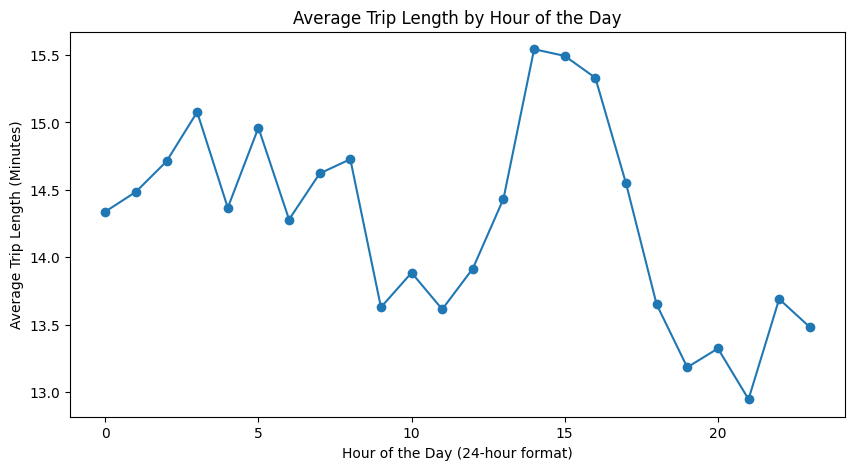

In [72]:
# Extract hour of the day from pickup datetime
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Group by hour and calculate average trip length
avg_trip_length_by_hour = df.groupby("pickup_hour")["trip_length_minutes"].mean()

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(avg_trip_length_by_hour.index, avg_trip_length_by_hour.values, marker='o', linestyle='-')
plt.xlabel("Hour of the Day (24-hour format)")
plt.ylabel("Average Trip Length (Minutes)")
plt.title("Average Trip Length by Hour of the Day")


# Show the plot
plt.show()



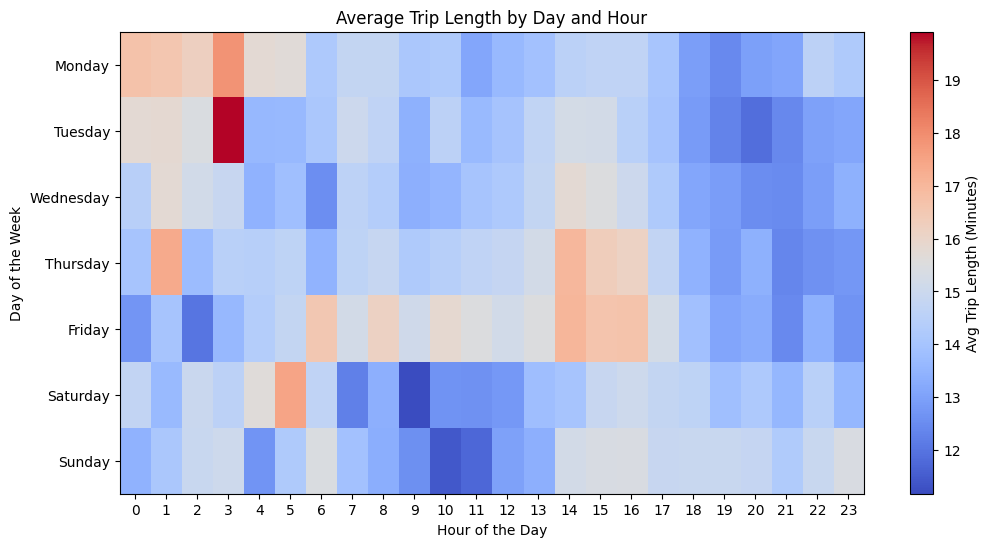

In [73]:
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()

avg_trip_length_by_day_hour = df.groupby(["pickup_day", "pickup_hour"])["trip_length_minutes"].mean().unstack()

ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
avg_trip_length_by_day_hour = avg_trip_length_by_day_hour.reindex(ordered_days)

# Plot heatmap to visualize trip length patterns
plt.figure(figsize=(12, 6))
plt.imshow(avg_trip_length_by_day_hour, aspect="auto", cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Avg Trip Length (Minutes)")
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.xticks(range(24), range(24))  # Show 24-hour format on x-axis
plt.yticks(range(len(ordered_days)), ordered_days)  # Show ordered days on y-axis
plt.title("Average Trip Length by Day and Hour")

# Show the plot
plt.show()


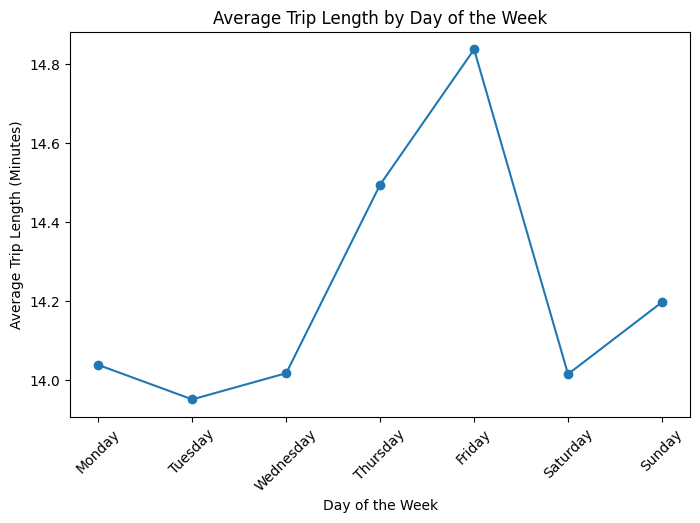

In [75]:
avg_trip_length_by_day = df.groupby("pickup_day")["trip_length_minutes"].mean()

# Reorder the index for correct day sequence
avg_trip_length_by_day = avg_trip_length_by_day.reindex(ordered_days)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(avg_trip_length_by_day.index, avg_trip_length_by_day.values, marker='o', linestyle='-')
plt.xlabel("Day of the Week")
plt.ylabel("Average Trip Length (Minutes)")
plt.title("Average Trip Length by Day of the Week")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

In [ ]:

#0.00 2.2 mil
#1.25 150k
#-1.25 1057
df['airport_fee'].value_counts()

#I thought this would answer what's up with Tuesday but it doesn't
df[df['airport_fee'] == 1.25].groupby('pickup_day')['airport_fee'].value_counts().sort_values()

,,count
pickup_day,airport_fee,
Thursday,1.25,17846
Wednesday,1.25,18015
Friday,1.25,18526
Saturday,1.25,19709
Tuesday,1.25,20624
Sunday,1.25,31665
Monday,1.25,32916


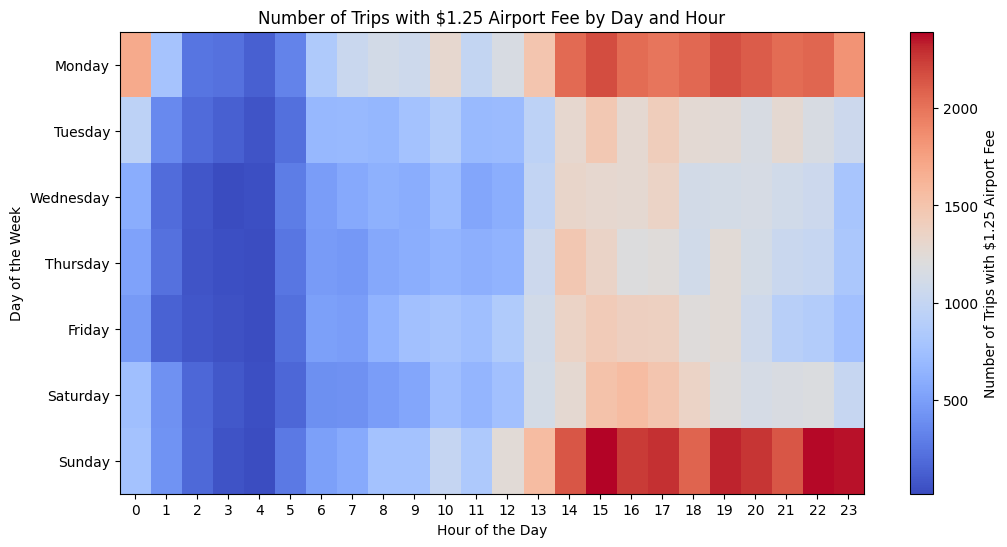

In [ ]:

df_airport = df[df['airport_fee'] == 1.25]

airport_trips_by_day_hour = df_airport.groupby(["pickup_day", "pickup_hour"]).size().unstack(fill_value=0)

airport_trips_by_day_hour = airport_trips_by_day_hour.reindex(ordered_days)

plt.figure(figsize=(12, 6))
plt.imshow(airport_trips_by_day_hour, aspect="auto", cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Number of Trips with $1.25 Airport Fee")
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.xticks(range(24), range(24))  # Show 24-hour format on x-axis
plt.yticks(range(len(ordered_days)), ordered_days)  # Show ordered days on y-axis
plt.title("Number of Trips with $1.25 Airport Fee by Day and Hour")

plt.show()


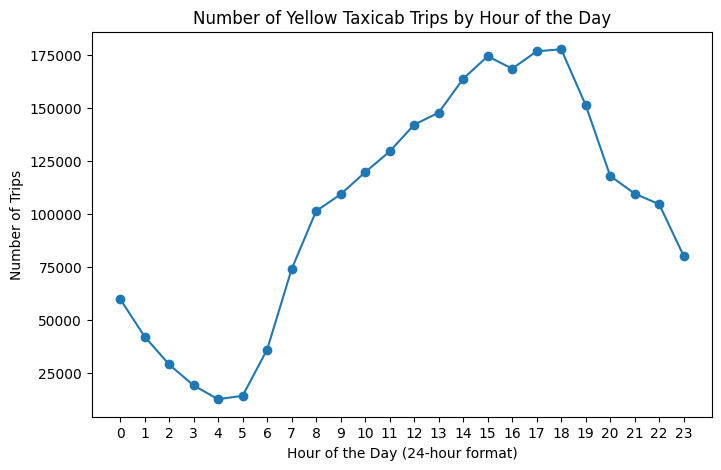

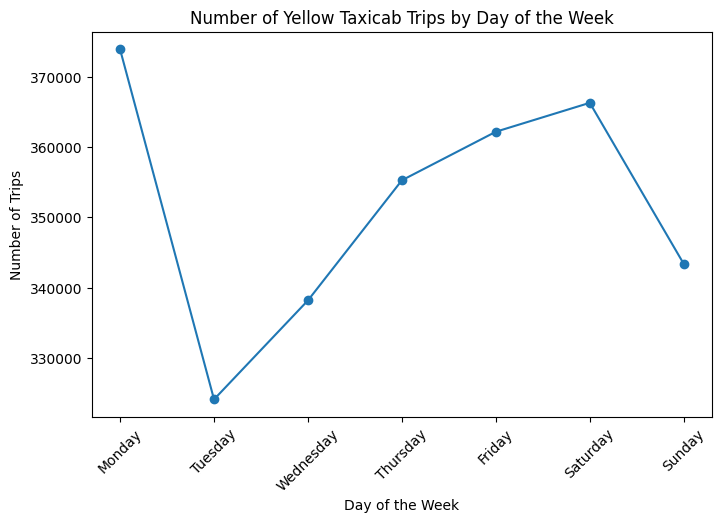

In [78]:
trip_count_by_hour = df.groupby("pickup_hour").size()

# Plot the number of trips by hour
plt.figure(figsize=(8, 5))
plt.plot(trip_count_by_hour.index, trip_count_by_hour.values, marker='o', linestyle='-')
plt.xlabel("Hour of the Day (24-hour format)")
plt.ylabel("Number of Trips")
plt.title("Number of Yellow Taxicab Trips by Hour of the Day")
plt.xticks(range(24))  # Ensure all hours are displayed


# Show the plot
plt.show()

# Group by day of the week to count trips
trip_count_by_day = df.groupby("pickup_day").size()

# Reorder the index for correct day sequence
trip_count_by_day = trip_count_by_day.reindex(ordered_days)

# Plot the number of trips by day
plt.figure(figsize=(8, 5))
plt.plot(trip_count_by_day.index, trip_count_by_day.values, marker='o', linestyle='-')
plt.xlabel("Day of the Week")
plt.ylabel("Number of Trips")
plt.title("Number of Yellow Taxicab Trips by Day of the Week")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability


# Show the plot
plt.show()

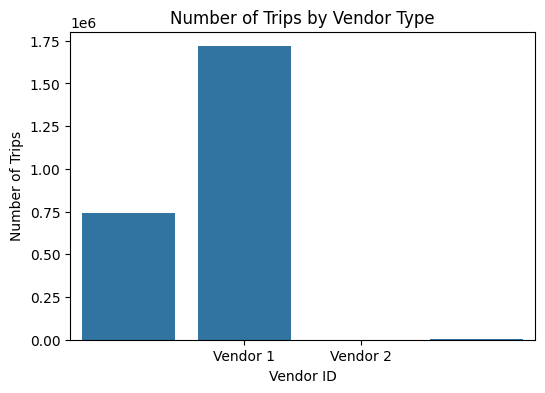

In [ ]:
# Count the number of trips by vendor type
vendor_trip_counts = df["VendorID"].value_counts()

# Plot the number of trips by vendor type
plt.figure(figsize=(6, 4))
sns.barplot(x=vendor_trip_counts.index, y=vendor_trip_counts.values)
plt.xlabel("Vendor ID")
plt.ylabel("Number of Trips")
plt.title("Number of Trips by Vendor Type")
plt.xticks([1, 2], ["Vendor 1", "Vendor 2"])  # Label vendors

# Show the plot
plt.show()

# Compare average trip length by vendor type
avg_trip_length_by_vendor = df.groupby("VendorID")["trip_length_minutes"].mean()




In [ ]:
df['VendorID'].value_counts()

,count
VendorID,
2,1716604
1,742581
6,4227
5,36


In [ ]:
df.groupby('VendorID')['trip_length_minutes'].mean()

,trip_length_minutes
VendorID,
1,12.91
2,14.73
5,46.69
6,40.73


In [ ]:
#vendors 5 and 6 don't do airport trips, so why are they so high
df[df['airport_fee'] > 0].groupby('VendorID')['trip_length_minutes'].mean()

#something to look into: Are airport trips longer than regular trips?

,trip_length_minutes
VendorID,
1,29.08
2,32.34


In [ ]:
# Categorize trips as airport vs. non-airport
df["is_airport_trip"] = df["airport_fee"] > 0

# Compare average trip length for airport vs. non-airport trips
avg_trip_length_airport = df.groupby("is_airport_trip")["trip_length_minutes"].mean()

avg_trip_length_airport


,trip_length_minutes
is_airport_trip,
False,13.03
True,31.46


In [ ]:

#Vendor 2 can hold more passengers
df[df["passenger_count"].isin([0, 7, 8, 9])].groupby("passenger_count")["VendorID"].value_counts()

passenger_count  VendorID
0                1           69395
                 2           48600
                 6            4227
                 5              36
7                2               9
8                2               8
9                2               3
Name: count, dtype: int64

In [ ]:
df[df["pickup_day"] == "Tuesday"][df["pickup_hour"] == 3][["VendorID"]].value_counts()

<ipython-input-127-684d10fc2a4a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["pickup_day"] == "Tuesday"][df["pickup_hour"] == 3][["VendorID","trip_distance"]].value_counts()


VendorID  trip_distance
1         0.00             10
          1.10             10
          1.00              9
          0.60              9
2         0.00              9
                           ..
          1.98              1
          1.97              1
          1.94              1
          1.93              1
6         14.65             1
Name: count, Length: 482, dtype: int64

In [ ]:
df[df["pickup_day"] == "Tuesday"][df["pickup_hour"] == 3]["trip_distance"].mean()

<ipython-input-129-3be35c389009>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["pickup_day"] == "Tuesday"][df["pickup_hour"] == 3]["trip_distance"].mean()


5.6649928057553955

In [ ]:

#trip distance is roughly the same for those tuesday trips than other trips
df["trip_distance"].mean()

5.474995477883032

In [ ]:
trip_count_by_day_hour = df.groupby(["pickup_day", "pickup_hour"]).size().unstack(fill_value=0)

# Reorder days of the week for proper visualization
trip_count_by_day_hour = trip_count_by_day_hour.reindex(ordered_days)

# Plot heatmap to visualize trip activity by day and hour
plt.figure(figsize=(12, 6))
plt.imshow(trip_count_by_day_hour, aspect="auto", cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Number of Trips")
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.xticks(range(24), range(24))  # Show 24-hour format on x-axis
plt.yticks(range(len(ordered_days)), ordered_days)  # Show ordered days on y-axis
plt.title("Taxi Activity by Day and Hour")

# Show the plot
plt.show()

NameError: name 'df' is not defined

In [44]:
df['Hour'] = df['tpep_pickup_datetime'].dt.hour
df['Day'] = df['tpep_pickup_datetime'].dt.day_name()

# Create a pivot table to count occurrences
heatmap_data = df.pivot_table(index='Day', columns='Hour', values='pickup_datetime', aggfunc='count')

# Reorder the days for better visualization
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(days_order)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".0f")
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.title("Busiest Hours of the Week (NYC Taxi Rides)")
plt.show()

KeyError: 'pickup_datetime'

In [47]:
# **1. Monday/Tuesday Early Morning (Midnight - 3 AM)**
early_week_hours = df[(df['day_of_week'].isin(['Monday', 'Tuesday'])) & (df['hour'].between(0, 3))]

# Summary statistics for early week late-night trips
early_week_summary = early_week_hours[['trip_length_minutes']].describe()

# **2. Thursday/Friday Afternoon (2 PM - 4 PM)**
late_week_hours = df[(df['day_of_week'].isin(['Thursday', 'Friday'])) & (df['hour'].between(14, 16))]

# Summary statistics for late week afternoon trips
late_week_summary = late_week_hours[['trip_length_minutes']].describe()

# Print results
print("Summary Stats for Monday/Tuesday (Midnight - 3 AM)")
print(early_week_summary)
print("\nSummary Stats for Thursday/Friday (2 PM - 4 PM)")
print(late_week_summary)

Summary Stats for Monday/Tuesday (Midnight - 3 AM)
       trip_length_minutes
count             19303.00
mean                 16.48
std                  60.82
min                   0.00
25%                   6.03
50%                  11.60
75%                  19.85
max                1435.30

Summary Stats for Thursday/Friday (2 PM - 4 PM)
       trip_length_minutes
count            143352.00
mean                 16.61
std                  52.82
min                   0.00
25%                   7.00
50%                  11.23
75%                  18.08
max                4284.07


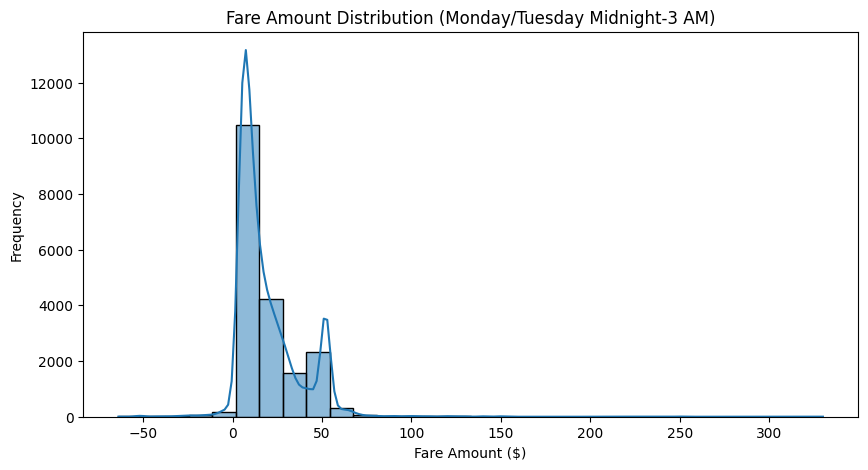

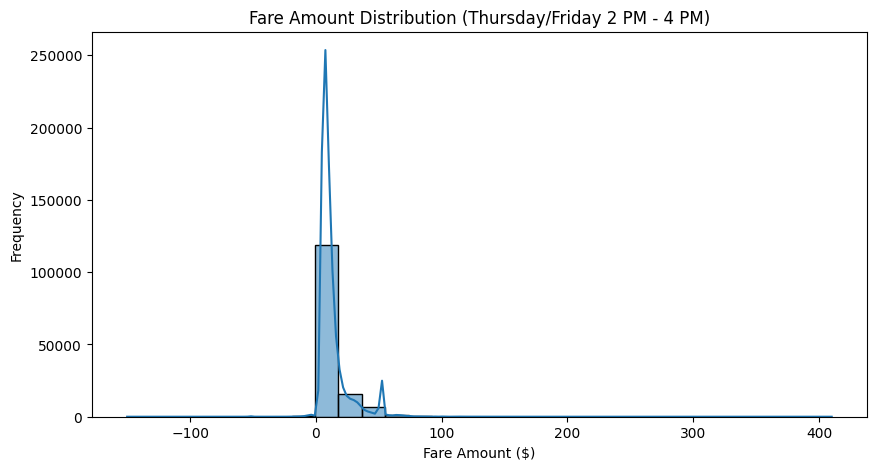

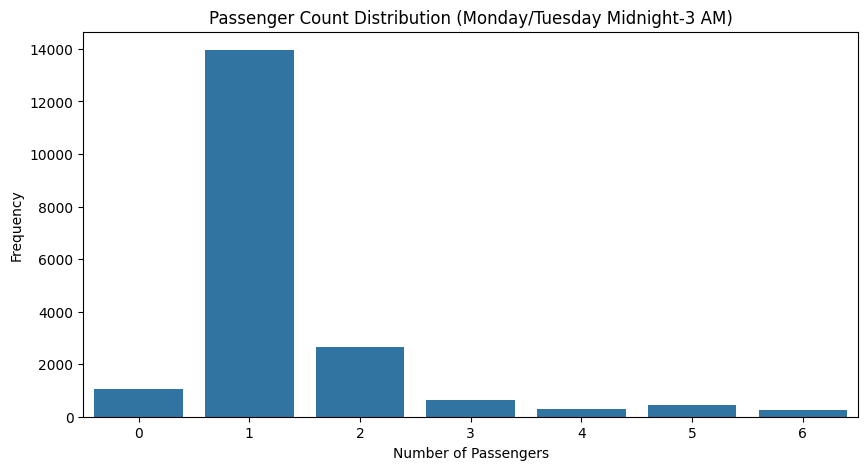

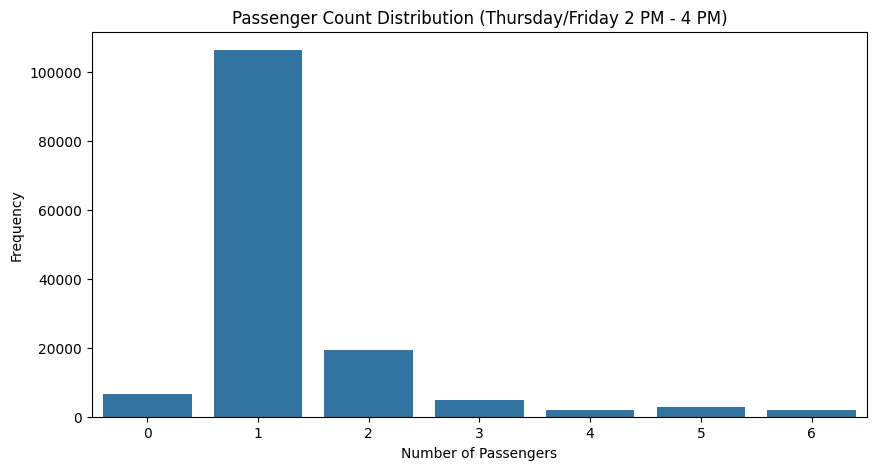

In [50]:


# **2. Distribution of Fare Amounts**
plt.figure(figsize=(10, 5))
sns.histplot(early_week_hours['fare_amount'], bins=30, kde=True)
plt.title("Fare Amount Distribution (Monday/Tuesday Midnight-3 AM)")
plt.xlabel("Fare Amount ($)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(late_week_hours['fare_amount'], bins=30, kde=True)
plt.title("Fare Amount Distribution (Thursday/Friday 2 PM - 4 PM)")
plt.xlabel("Fare Amount ($)")
plt.ylabel("Frequency")
plt.show()

# **3. Passenger Count Distribution**
plt.figure(figsize=(10, 5))
sns.countplot(data=early_week_hours, x='passenger_count')
plt.title("Passenger Count Distribution (Monday/Tuesday Midnight-3 AM)")
plt.xlabel("Number of Passengers")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=late_week_hours, x='passenger_count')
plt.title("Passenger Count Distribution (Thursday/Friday 2 PM - 4 PM)")
plt.xlabel("Number of Passengers")
plt.ylabel("Frequency")
plt.show()

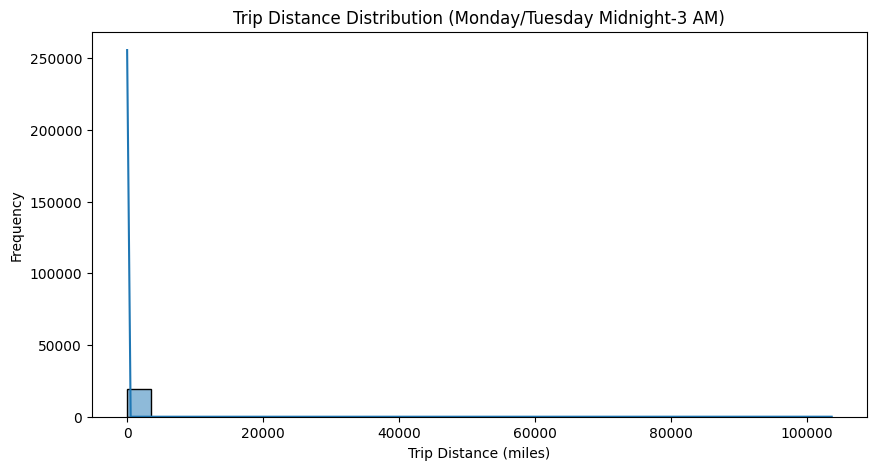

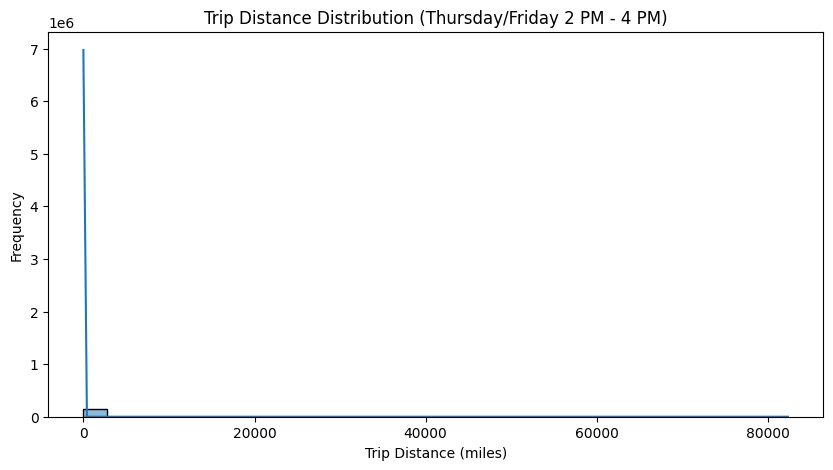

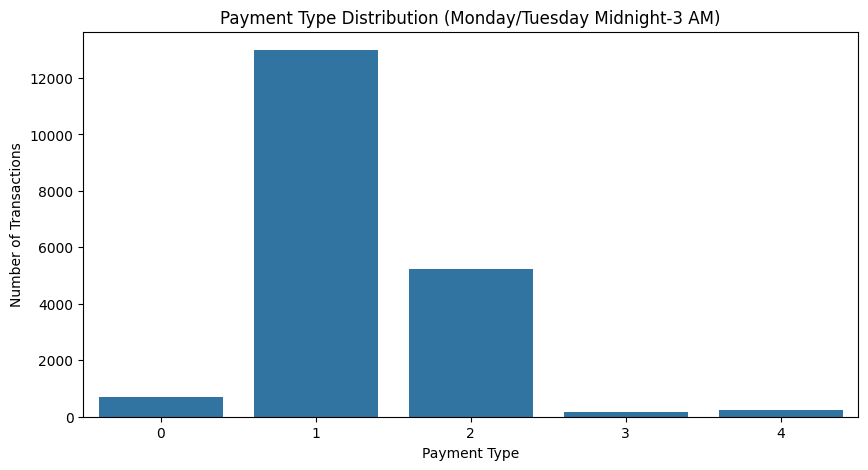

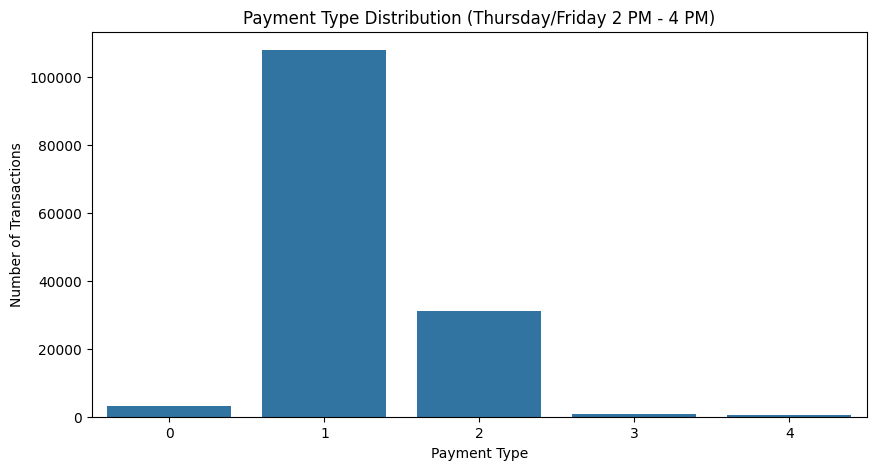

<ipython-input-52-b047bf4c47d1>:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(early_week_hours['hour'], shade=True)


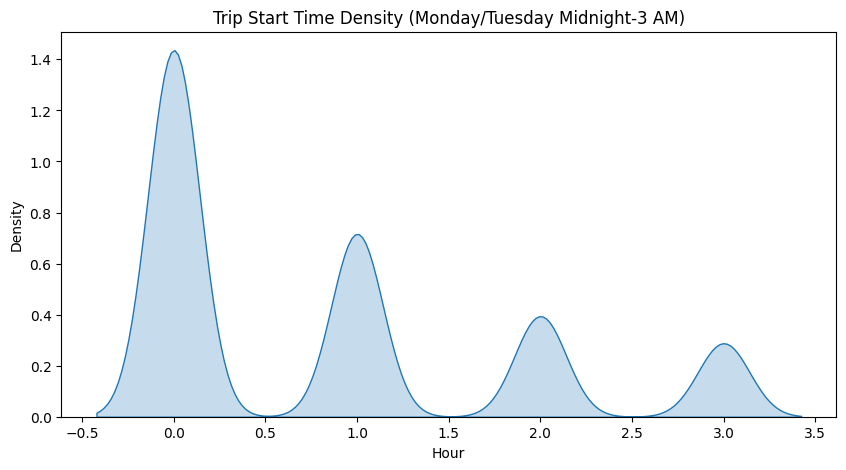

<ipython-input-52-b047bf4c47d1>:40: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(late_week_hours['hour'], shade=True)


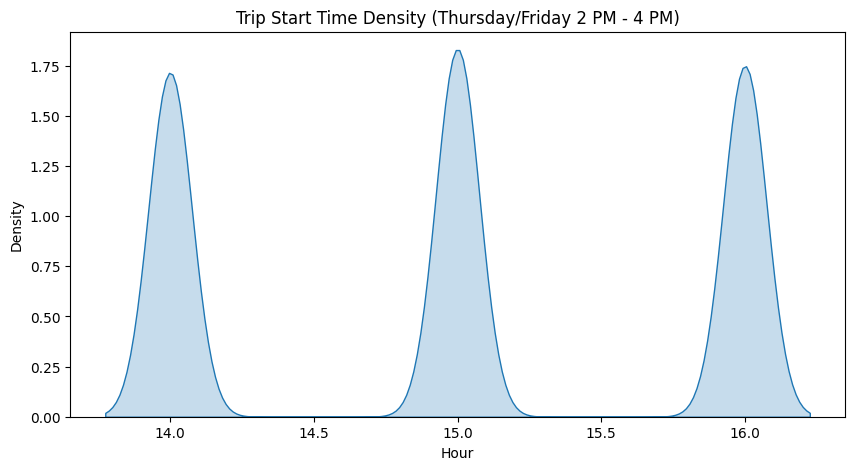

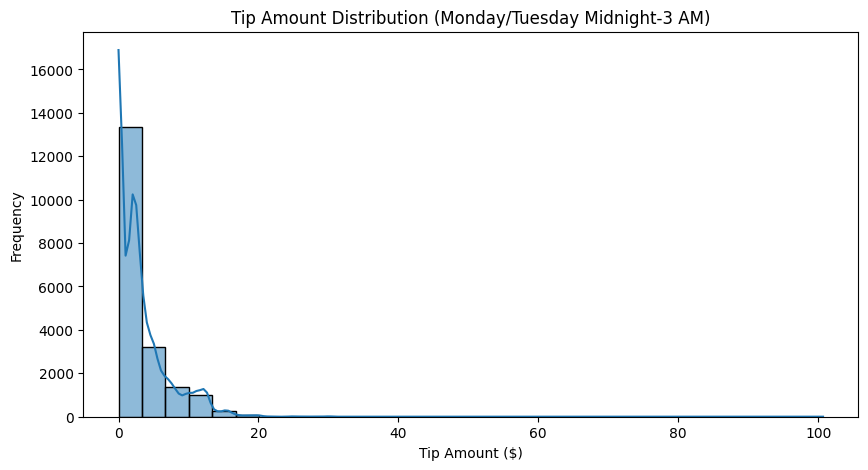

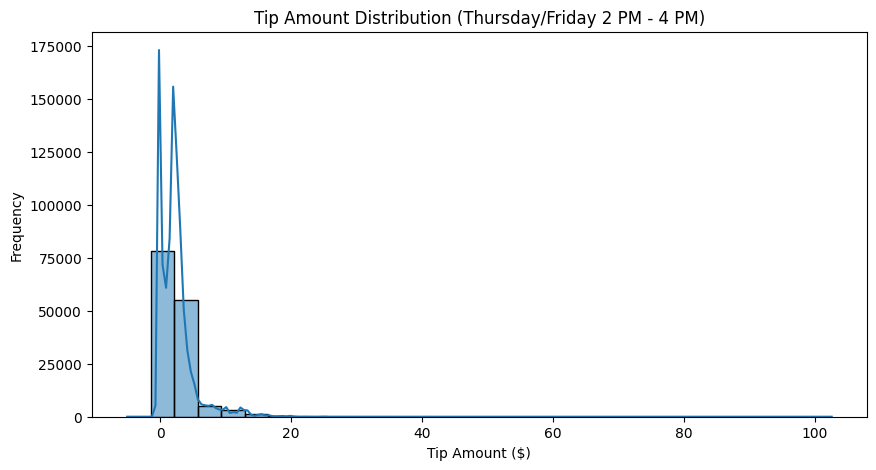

In [52]:
# **4. Trip Distance Distribution**
plt.figure(figsize=(10, 5))
sns.histplot(early_week_hours['trip_distance'], bins=30, kde=True)
plt.title("Trip Distance Distribution (Monday/Tuesday Midnight-3 AM)")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(late_week_hours['trip_distance'], bins=30, kde=True)
plt.title("Trip Distance Distribution (Thursday/Friday 2 PM - 4 PM)")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Frequency")
plt.show()

# **5. Payment Type Distribution**
plt.figure(figsize=(10, 5))
sns.countplot(data=early_week_hours, x='payment_type')
plt.title("Payment Type Distribution (Monday/Tuesday Midnight-3 AM)")
plt.xlabel("Payment Type")
plt.ylabel("Number of Transactions")
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=late_week_hours, x='payment_type')
plt.title("Payment Type Distribution (Thursday/Friday 2 PM - 4 PM)")
plt.xlabel("Payment Type")
plt.ylabel("Number of Transactions")
plt.show()

# **6. Trip Start Hour Density Plot**
plt.figure(figsize=(10, 5))
sns.kdeplot(early_week_hours['hour'], shade=True)
plt.title("Trip Start Time Density (Monday/Tuesday Midnight-3 AM)")
plt.xlabel("Hour")
plt.ylabel("Density")
plt.show()

plt.figure(figsize=(10, 5))
sns.kdeplot(late_week_hours['hour'], shade=True)
plt.title("Trip Start Time Density (Thursday/Friday 2 PM - 4 PM)")
plt.xlabel("Hour")
plt.ylabel("Density")
plt.show()

# **7. Tip Amount Distribution**
plt.figure(figsize=(10, 5))
sns.histplot(early_week_hours['tip_amount'], bins=30, kde=True)
plt.title("Tip Amount Distribution (Monday/Tuesday Midnight-3 AM)")
plt.xlabel("Tip Amount ($)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(late_week_hours['tip_amount'], bins=30, kde=True)
plt.title("Tip Amount Distribution (Thursday/Friday 2 PM - 4 PM)")
plt.xlabel("Tip Amount ($)")
plt.ylabel("Frequency")
plt.show()

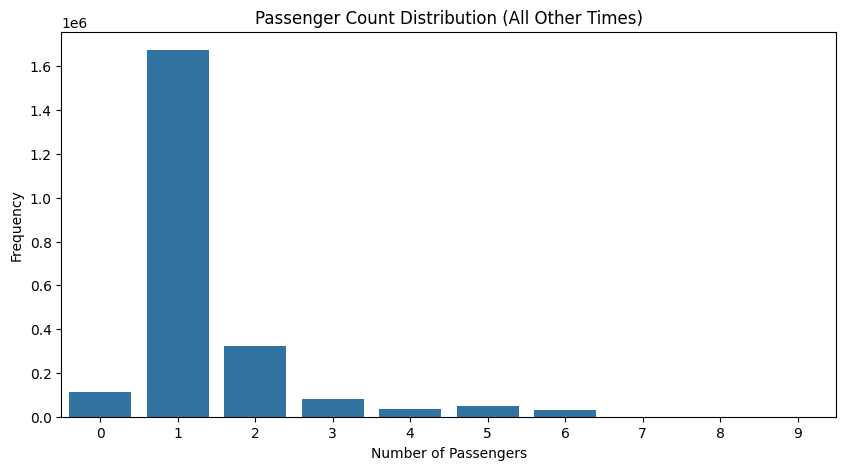

In [55]:
# Filter data for all times *except* the two specific time frames
excluded_hours = df[~(
    ((df['day_of_week'].isin(['Monday', 'Tuesday'])) & (df['hour'].between(0, 3))) |
    ((df['day_of_week'].isin(['Thursday', 'Friday'])) & (df['hour'].between(14, 16)))
)]

# Create passenger count distribution for all other times
plt.figure(figsize=(10, 5))
sns.countplot(data=excluded_hours, x='passenger_count')
plt.title("Passenger Count Distribution (All Other Times)")
plt.xlabel("Number of Passengers")
plt.ylabel("Frequency")
plt.show()


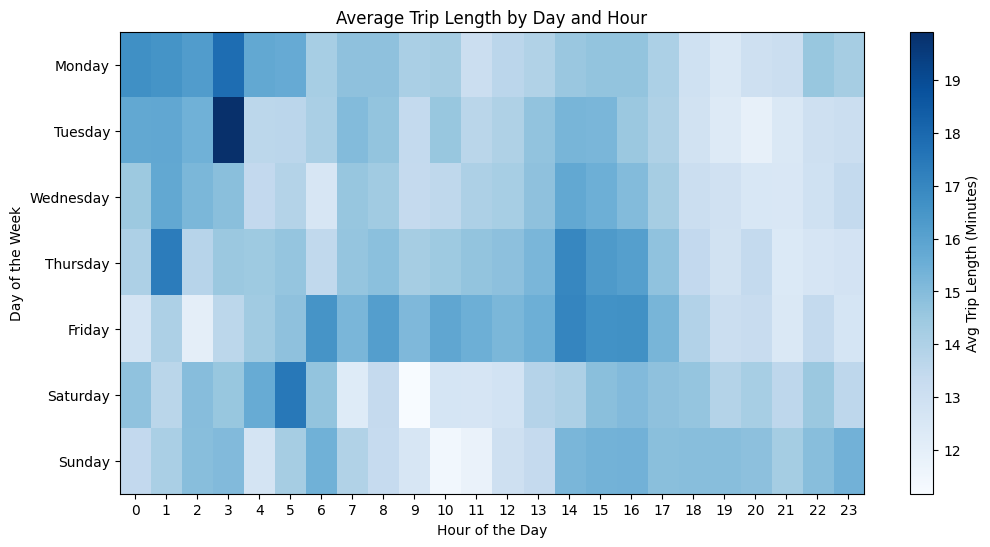

In [59]:
# Reorder days to start from Monday
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
avg_trip_length_by_day_hour = avg_trip_length_by_day_hour.reindex(ordered_days)

# **Create the heatmap using Matplotlib (no Seaborn)**
plt.figure(figsize=(12, 6))

# Use imshow with "Blues" colormap to match previous aesthetic
plt.imshow(avg_trip_length_by_day_hour, aspect="auto", cmap="Blues", interpolation="nearest")

# Add colorbar with label
cbar = plt.colorbar()
cbar.set_label("Avg Trip Length (Minutes)")

# Set axis labels and title
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.title("Average Trip Length by Day and Hour")

# Format X and Y ticks
plt.xticks(ticks=np.arange(24), labels=np.arange(24))  # 24-hour format
plt.yticks(ticks=np.arange(len(ordered_days)), labels=ordered_days)  # Days in correct order

# Show the plot
plt.show()

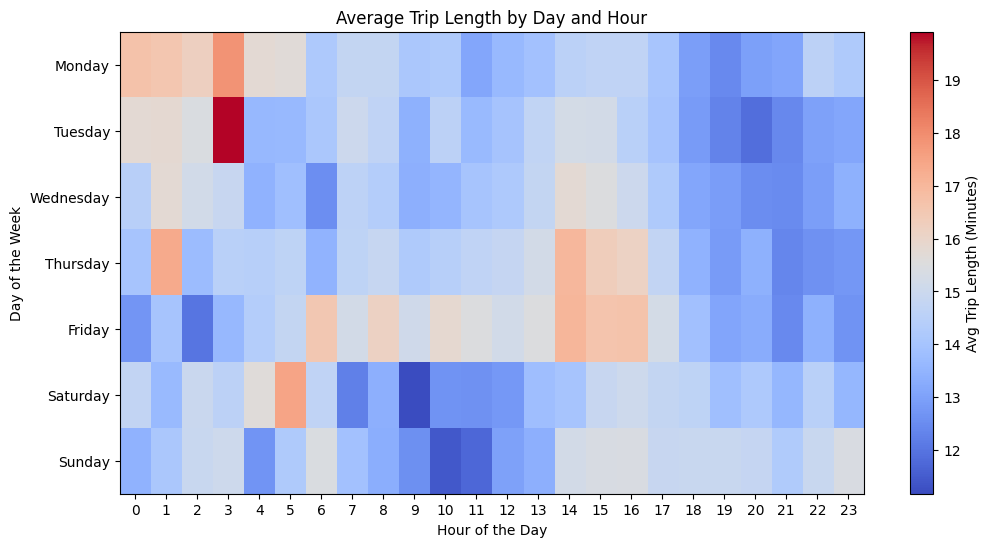

In [61]:
# Reorder days to start from Monday
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
avg_trip_length_by_day_hour = avg_trip_length_by_day_hour.reindex(ordered_days)

# **Create the heatmap using Matplotlib**
plt.figure(figsize=(12, 6))

# Use imshow with "coolwarm" colormap (red to blue) to match previous aesthetic
plt.imshow(avg_trip_length_by_day_hour, aspect="auto", cmap="coolwarm", interpolation="nearest")

# Add colorbar with label
cbar = plt.colorbar()
cbar.set_label("Avg Trip Length (Minutes)")

# Set axis labels and title
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.title("Average Trip Length by Day and Hour")

# Format X and Y ticks
plt.xticks(ticks=np.arange(24), labels=np.arange(24))  # 24-hour format
plt.yticks(ticks=np.arange(len(ordered_days)), labels=ordered_days)  # Days in correct order

# Show the plot
plt.show()

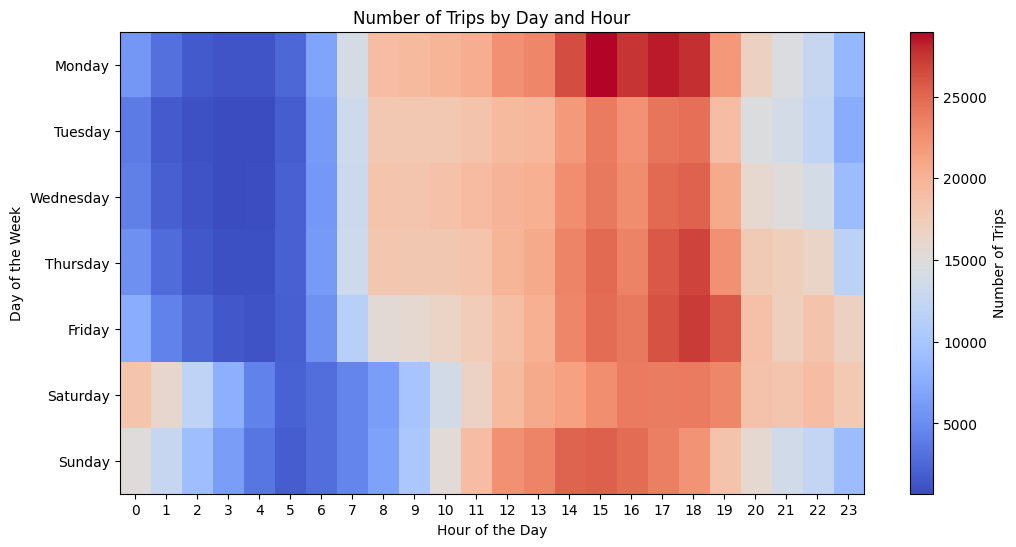

In [65]:
trip_count_by_day_hour = df.groupby(["pickup_day", "pickup_hour"])["trip_length_minutes"].count().unstack()


# Reorder days to start from Monday
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
trip_count_by_day_hour = trip_count_by_day_hour.reindex(ordered_days)

# **Create the heatmap using Matplotlib**
plt.figure(figsize=(12, 6))

# Use imshow with "coolwarm" colormap (red to blue) to match previous aesthetic
plt.imshow(trip_count_by_day_hour, aspect="auto", cmap="coolwarm", interpolation="nearest")

# Add colorbar with label
cbar = plt.colorbar()
cbar.set_label("Number of Trips")

# Set axis labels and title
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.title("Number of Trips by Day and Hour")

# Format X and Y ticks
plt.xticks(ticks=np.arange(24), labels=np.arange(24))  # 24-hour format
plt.yticks(ticks=np.arange(len(ordered_days)), labels=ordered_days)  # Days in correct order

# Show the plot
plt.show()